In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# 🐋 Happy whale and dolphin indentification

A part of my code is run in google colablatory

一部をコラボラトリーで実行しました。

# **Goal**
I'd like to crop the images of Whale and dolphins.

My idea are below

1. Prepare anotated images by Vott.

2. Train by Yolov5 and create weights data for detecting whales and dolphin.

3. Detect them form original images from this competition dataset and croping them.

クジラとイルカのデータを切る取ることがこのCodeでの目標です。

アイデア

アノテーションデータをVottを用いて用意します。

アノテーションデータを訓練しYolov5でオリジナルの検出器を作成し、検出を試みます。

検出器をコンペデータへ適用し画像を切り取ります。



# Preparing anotated images

Anotaion by Vott.
Vott
[https://github.com/microsoft/VoTT](http://)

I've anotated about 100 images by manual work and exported them in Pascal VOC format.

And then convert the Pascal VOC format to Yolo format by using Roboflow(https://roboflow.com/).

Please refer to my datasets.　→→　[https://www.kaggle.com/yusukesueyoshi/happy-whale-and-dolphin-weights](http://)

アノテーションデータをVottで作成しました。

私の場合は約100ほどのデータを生成しPascal VOC format 形式で出力し、
 
RoboflowでYoloフォーマットへ変換しています。

データセットも公開していますので参考までに。

# Set up yolov5!

Yolov5のセットアップ

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

# Training by yolov5

Download your dataset to your google drive from roboflow you made.

Please disgnate a path to your data.yaml file as an argument of train.py. 

If you want to disignate a path to result, please disignate a path as a project argument.

And editing daga.yaml is also required to disignate the path to train and test datasets.

I haven't excecuted train.py this notebook though, my code are shown FYR.

グーグルドライブへアノテーションしたデータを保存し、

Train.pyで読み込ませています。

それぞれの環境に合わせてPathを設定してください。

data.yamlファイルの中身に訓練・テストデータのパスを設定します。

このノートブックでは実行していないですが、ご参考までに

In [ ]:
#!python train.py --batch 16 --epochs 300 --data /content/drive/MyDrive/whale/data.yaml --project /content/drive/MyDrive/whale/train  --weights yolov5s.pt --cache

After this process is completed, you can find the weight file named best.pt and last.pt.

The file of best.py includes the best result, I used it for detecting.

train.py が終了するとbest.ptとlast.ptがweightsフォルダーに作られます。

最も良好な結果を示すbest.ptを用いてdetectするのが良いと思います。

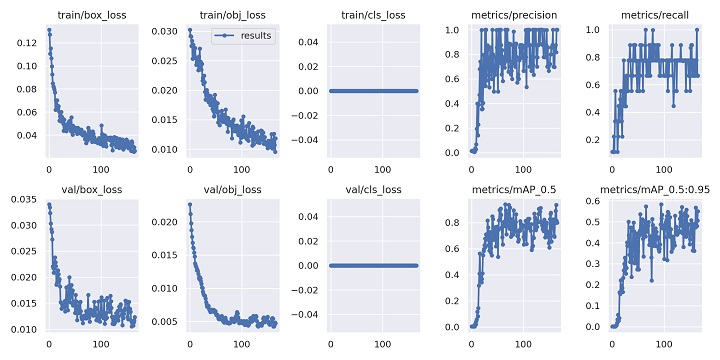

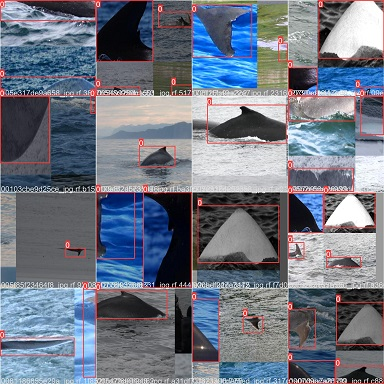


# Detecting whale and dolphin from competition datasets.

Execute detect.py with best.pt which are trained by original datasets.

When you apply it for the competition datasets, please set /kaggle/input/happy-whale-and-dolphin/test_images as the source argument.


detect.pyを実行します。best.ptをウェイトとして採用しました。

sourceの引数としてフォルダをしていするとフォルダ内のjpgすべてに適用できます。


In [ ]:
!python detect.py --weights /kaggle/input/happy-whale-and-dolphin-weights/best.pt --conf 0.2 --source /kaggle/input/happy-whale-and-dolphin/test_images/000110707af0ba.jpg --project /kaggle/working --save-crop

In [ ]:
display.Image(filename='/kaggle/working/exp/000110707af0ba.jpg', width=600)

In [ ]:
display.Image(filename='/kaggle/working/exp/crops/dolphin-whale/000110707af0ba.jpg', width=600)

**Thank you for reading!**